## Load Dataset and Understand the data

In [81]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = load_iris()

In [83]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

- since we are in Unsupervised learning so we can not include target values
- because unsupervied doesn't have any label values or target values

In [84]:
iris_data = pd.DataFrame(data = data['data'], columns=data.feature_names)

In [86]:
# iris data without labels
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
iris_data.shape

(150, 4)

In [87]:
# statistical information
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [101]:
iris_data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [105]:
# checking null values
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

we need to find differnt flowers using above features, we have the data wich have only independent features and no target values that's why it is a unsupervised ML problem, here we cluster all the similar looking data such that all the similar flower are together

- we need to find what will be the no. of clusters (k)

## Data Visualization

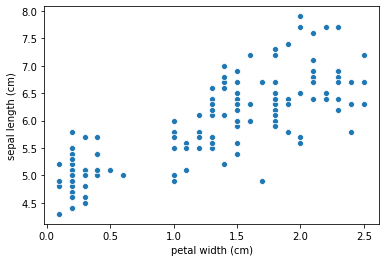

In [99]:
sns.scatterplot(iris_data['petal width (cm)'],iris_data['sepal length (cm)'])
plt.show()

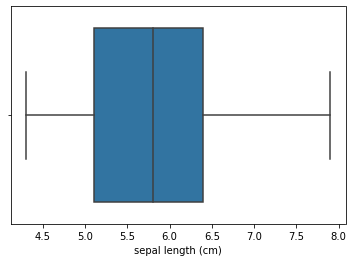

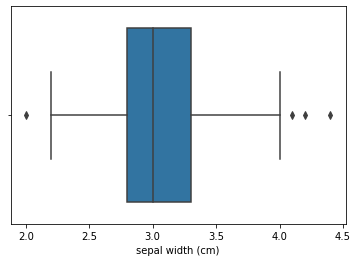

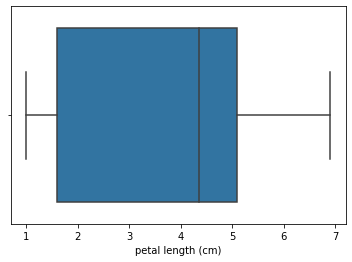

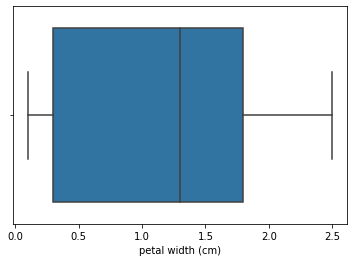

In [109]:
# checking Outliers
for i in iris_data.describe().columns:
    sns.boxplot(iris_data[i])
    plt.show()

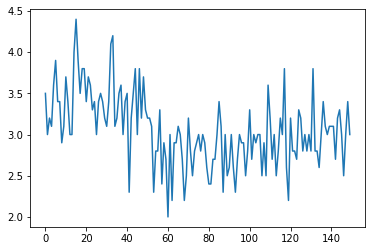

In [110]:
# column sepal width (cm) is not contributing that much
iris_data['sepal width (cm)'].plot() 
plt.show()

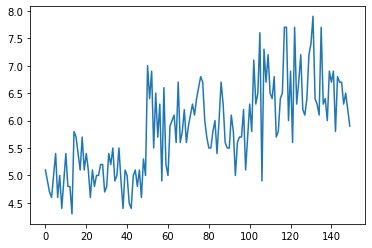

In [21]:
iris_data['sepal length (cm)'].plot()
plt.show()

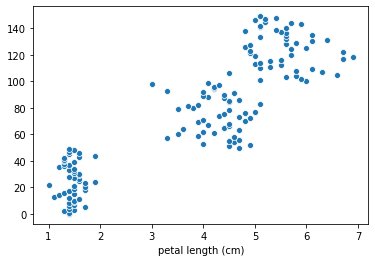

In [22]:
sns.scatterplot(iris_data['petal length (cm)'], iris_data.index)
plt.show()

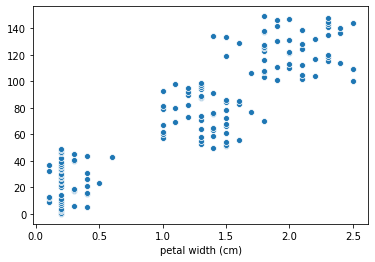

In [23]:
sns.scatterplot(iris_data['petal width (cm)'], iris_data.index)
plt.show()

- from ablove graph we can see three groups are formed
- so we consider clusers = 3

## Scaling Data

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
new_iris_data = iris_data.copy()
def make_min_max(data, col):
    mms = MinMaxScaler()
    new_iris_data[col] = mms.fit_transform(new_iris_data[[col]])
    return new_iris_data

In [113]:
for col in new_iris_data.iloc[:,:]:
    new_iris_data = make_min_max(new_iris_data, col)
    

In [114]:
new_iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


- In this unsupervised learning problem we are not going to split the data 
- here simple we fit the model and predict values

## Modelling 

In [115]:
from sklearn.cluster import KMeans

In [54]:
km = KMeans(n_clusters=3,max_iter=25)

- `n_clusters` :- no. cluster that we want to form
- `max_iter` :- no. of iteration of clusters
- basically when clusters gets same centriod, at that time itration of calculating centriod will stop
- it is not imp. to maintion max_iter but if we maintion max_iter it will iterate till that no. max_itre and gives more accurate result

In [116]:
km.fit(new_iris_data)

KMeans(max_iter=25, n_clusters=3)

In [117]:
km_pred = km.predict(new_iris_data)

- predicted values
- clusters form in numbers
- we maintion cluster - 3
- we gets three clusters 0, 1, and 2
- now which number is which flower we can not say it clearly because as we know unsupervied learning don't have labels
- so as we solve here unsupervised learning problems as we pretend like we dont's have labels
- for identify which number is which flower so for that we need to ask to leader or expert who can suggerst that
- as a analyst our work is done here, our work is to form clusters that we did

In [119]:
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [120]:
# other way to see clusters

km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [121]:
centers = km.cluster_centers_

- this are the centriod which form during the cluster formation
- we have 4 features so this cluster plot in 4-D space

In [122]:
values_iris = new_iris_data.values

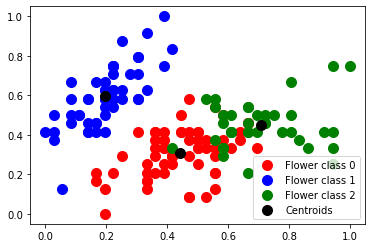

In [125]:
plt.scatter(values_iris[km_pred == 0, 0 ], values_iris[km_pred == 0, 1],
           s=100, c='red',label = 'Flower class 0')

plt.scatter(values_iris[km_pred == 1, 0 ], values_iris[km_pred == 1, 1],
           s=100, c='blue',label = 'Flower class 1')

plt.scatter(values_iris[km_pred == 2, 0 ], values_iris[km_pred == 2, 1],
           s=100, c='green',label = 'Flower class 2')

plt.scatter(centers[:,0], centers[:,1],
           s = 100, c= 'black',label = 'Centroids')
plt.legend()
plt.show()

- If we confused for choosing no. of clusters
- Their is a way to determind what will be the no. of cluster for the model
- Which is by using `elbo curve`

#### Elbo-Curve

In [126]:
ssd = {}
for clus in range(1,6,1):
    km = KMeans(n_clusters=clus, max_iter=50)
    km.fit(new_iris_data)
    ssd[clus] = km.inertia_
ssd

{1: 41.16611042137328,
 2: 12.12779075053819,
 3: 6.982216473785234,
 4: 5.516933472040375,
 5: 4.5809486401172945}

In [127]:
cluster = list(ssd.keys())
inertia = list(ssd.values())

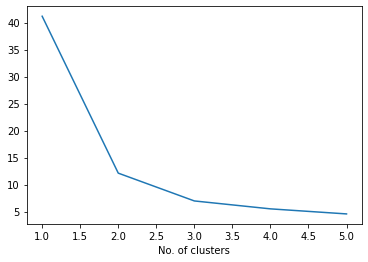

In [129]:
plt.plot(cluster,inertia)
plt.xlabel('No. of clusters')
plt.show()

- You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (Error) doesn't decrease significantly with every iteration.
- In above elbo curve we can see their are two sharp points accurs on curve
- One is at point 2 and second is at point 3
- It means we have two possible cluster k = 2 and k = 3
- We can take n_cluster = 2 or 3 
- Final output of the cluster depends on the leader, that how many classification they want.

#### So we have two possible no. of clusters we already create model for `3 clusters` now we create model for 2 clusters

In [130]:
km_new = KMeans(n_clusters=2,max_iter=25)
km_new.fit(new_iris_data)
km_new_pred = km_new.predict(new_iris_data)

In [132]:
centers_new = km_new.cluster_centers_

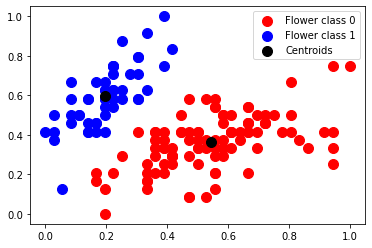

In [134]:
plt.scatter(values_iris[km_new_pred == 0, 0 ], values_iris[km_new_pred == 0, 1],
           s=100, c='red',label = 'Flower class 0')

plt.scatter(values_iris[km_new_pred == 1, 0 ], values_iris[km_new_pred == 1, 1],
           s=100, c='blue',label = 'Flower class 1')

plt.scatter(centers_new[:,0], centers_new[:,1],
           s = 100, c= 'black',label = 'Centroids')
plt.legend()
plt.show()